# Нейронные сети

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
import dill as pickle

from nn_model import *

import tensorflow as tf
import keras

sys.version

ModuleNotFoundError: No module named 'dill'

# Загрузка данных fishion mnist

In [13]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0

print(train_images.shape)

(60000, 28, 28)


In [16]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
train_labels=np.array(list(map(fromnum,train_labels)))

In [18]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
clothes_part_train=train_images[:30000]
clothes_part_label=train_labels[:30000]
clothes_part_train=clothes_part_train.reshape((30000,784))
clothes_part_label=clothes_part_label.reshape((30000,10))
train_images_flatten = train_images.reshape((60000,784))
train_labels_flatten = train_labels.reshape((60000,10))

print(clothes_part_train.shape, clothes_part_label.shape)

(30000, 784) (30000, 10)


# Обучение модели для fashion mnist

In [12]:
net = NetModel([100,10],activations={1:ReLu,2:sigmoid},input_layer=784,seed=4)
st=time()
np.random.seed(3)
net.fit(clothes_part_train,clothes_part_label,method='Adagrad',batch_size=16, iterations=50000,lr=0.001,printq=1, lambd=0, gamma=0.9)
print(time()-st)

Cost after iteration 0: 2623.202060
Cost after iteration 1: 1888.736269
Cost after iteration 2: 1547.571797
Cost after iteration 3: 1402.435273
KeyboardInTerrupt
20.149521112442017


# Загрузка модели

In [21]:
with open('CLOTHES_net_v1.pickle', 'rb') as f:
    tr_copy=pickle.load(f)

# Проверка на изображениях из тестовой выборки

True label:  Bag
Predicted:  Bag


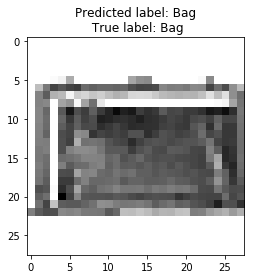

In [22]:
imnum = 3011
x=test_images[imnum]
label=test_labels[imnum]
print('True label: ',class_names[label])
print('Predicted: ',class_names[np.argmax(f_predict(x.reshape(1,784),tr_copy,printq=False))])
plt.title('Predicted label: {}\n True label: {}'.format(class_names[np.argmax(f_predict(x.reshape(1,784),tr_copy,printq= False))],class_names[label]))
plt.imshow(x, cmap=plt.cm.gray_r, interpolation='nearest')

#label=mnist_part_test_label[imnum]
#plt.title('Predicted label: {}\n True label: {}'.format(np.argmax(net1.predict(np.array([x]),printq= False)),np.argmax(label)))
#plt.imshow(norm1, cmap=plt.cm.gray_r, interpolation='nearest')

# Загрузка данных mnist

In [61]:
from keras.datasets import mnist

In [62]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [63]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [64]:
y_train=np.array(list(map(fromnum,y_train)))
y_test=np.array(list(map(fromnum,y_test)))

In [65]:
numbers_part_train=X_train[:30000]
numbers_part_label=y_train[:30000]
numbers_part_train=numbers_part_train.reshape((30000,784))
numbers_part_label=numbers_part_label.reshape((30000,10))
train_numbers_flatten = X_train.reshape((60000,784))
train_numbers_flatten = y_train.reshape((60000,10))

test_numbers = X_test[:5000]
test_numbers = test_numbers.reshape(5000, 784)
test_labels = y_test[:5000]
test_labels = test_labels.reshape(5000,10)
print(test_numbers.shape, test_labels.shape)

(5000, 784) (5000, 10)


In [72]:
class_names1 = ['0', '1', '2', '3', '4', 
               '5', '6', '7', '8', '9']

# Функция, делающая изображение серым

In [29]:
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst


# Обучение модели для mnist

In [39]:
net = NetModel([128,128,10],activations={1:ReLu,2:ReLu,3:sigmoid},input_layer=784,seed=4)
st=time()
np.random.seed(3)
net.fit(numbers_part_train,numbers_part_label,method='GD',batch_size=16, iterations=10000,lr=0.01,printq=1, lambd = 0)
загprint(time()-st)

NameError: name 'numbers_part_train' is not defined

# Сохранение модели

In [ ]:
net.save("mnist_numbers.pickle")

# Загрузка модели 

In [30]:
with open('mnist_numbers.pickle', 'rb') as f1:
    tr_copy1=pickle.load(f1)

# Проверка на изображениях из тестовой выборки

True label:  1
Predicted:  1


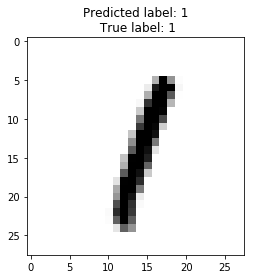

In [71]:
imnum = 5
x=X_test[imnum]
label=y_test[imnum]
print('True label: ',class_names1[np.argmax(label)])
print('Predicted: ',class_names1[np.argmax(f_predict(x.reshape(1,784),tr_copy1,printq=False))])
plt.title('Predicted label: {}\n True label: {}'.format(class_names1[np.argmax(f_predict(x.reshape(1,784),tr_copy1,printq= False))],class_names1[np.argmax(label)]))
plt.imshow(x, cmap=plt.cm.gray_r, interpolation='nearest')

# Загрузка данных для cifar10

In [33]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [34]:
from keras.datasets import cifar10
from keras.utils import np_utils

In [44]:
np.random.seed(42)

# Загружаем данные
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Размер мини-выборки
batch_size = 32
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений
img_rows, img_cols = 32, 32
# Количество каналов в изображении: RGB
img_channels = 3

# Нормализуем данные
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print(Y_test.shape)

(10000, 10)


In [36]:
print(X_train[1].shape)
X_train_gray = grayscale(X_train)
print(X_train_gray.shape)
print(Y_train.shape)


(32, 32, 3)
(50000, 32, 32, 1)
(50000, 10)


In [43]:
numbers_part_train_1=X_train_gray[:30000]
numbers_part_label_1=Y_train[:30000]
numbers_part_train_1=numbers_part_train_1.reshape((30000,1024))
numbers_part_label_1=numbers_part_label_1.reshape((30000,10))

numbers_part_test_1 = grayscale(X_test)
numbers_part_test_1 = numbers_part_test_1.reshape((10000,1024))
print(numbers_part_train_1.shape, numbers_part_label_1.shape)

(30000, 1024) (30000, 10)


# Обучение модели для cifar10

In [14]:
#net = NetModel([512,10],activations={1:ReLu,2:sigmoid},input_layer=1024,seed=5)
st=time()
np.random.seed(5)
net.fit(numbers_part_train_1,numbers_part_label_1,method='NAG',batch_size=16, iterations=5000,lr=0.1,printq=1, lambd = 0,gamma = 0.9)
print(time()-st)

Cost after iteration 0: 1424.225275
Cost after iteration 1: 1508.703560
KeyboardInTerrupt
70.73932647705078


# Сохранение модели

In [13]:
net.save("cifar_numbers.pickle")

# Загрузка модели

In [38]:
with open('cifar-10_saved_model.pickle', 'rb') as f2:
    tr_copy2=pickle.load(f2)

# Проверка на изображениях из тестовой выборки

True label:  собака
Predicted:  собака


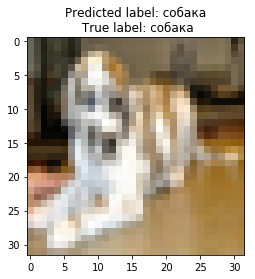

In [39]:
imnum = 1111
x=numbers_part_train_1[imnum]
x1 = X_train[imnum]
label=numbers_part_label_1[imnum]
print('True label: ',classes[np.argmax(label)])
print('Predicted: ',classes[np.argmax(f_predict(x.reshape(1,1024),tr_copy2,printq=False))])
plt.title('Predicted label: {}\n True label: {}'.format(classes[np.argmax(f_predict(x.reshape(1,1024),tr_copy2,printq= False))],classes[np.argmax(label)]))
plt.imshow(x1, cmap=plt.cm.gray_r, interpolation='nearest')

In [74]:
def accuracy(test_data,test_label, classes, model):
    c = 0
    for i in range(1000):
        x = test_data[i]
        label = test_label[i]
        if classes[np.argmax(label)] == classes[np.argmax(f_predict(x.reshape(1,784),model,printq=False))]:
            c += 1
    return c/1000

        
    

In [52]:
print(accuracy(numbers_part_train_1, numbers_part_label_1, classes,tr_copy2 ))

0.7692


In [76]:
print(accuracy(test_numbers, test_labels, class_names1,tr_copy1 ))

0.964
